In [108]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [109]:
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

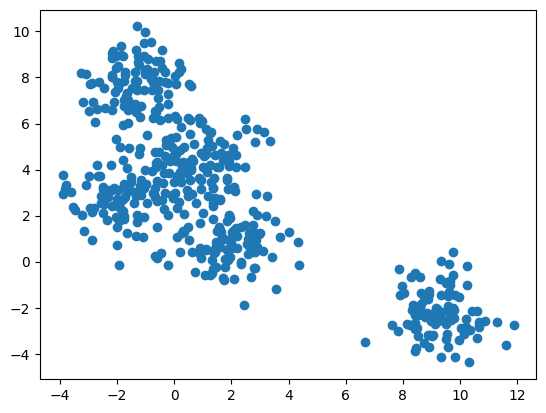

In [110]:
plt.scatter(X, Y)

In [111]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [112]:
def Distance(P1, P2):
    return np.sqrt((P2.x-P1.x)**2+(P2.y-P1.y)**2)
    ### Enter Code to find distance between 2 points

def Mean(AP):
    sum_x=0
    sum_y=0
    for point in AP:
        sum_x+=point.x
        sum_y+=point.y
    n=len(AP)
    return Point(sum_x/n,sum_y/n)
    ### Write code to find centroid of an group of points

In [113]:
# def MinPoint(P, AP):
#     ### To find the group a point P belongs to given centroids AP
#     check=float('inf')
#     min_point=None
#     for point in AP:
#         distance=Distance(P,point)
#         if distance<check:
#             check=distance
#             min_point=point
#     return min_point
def MinPoint(P, AP):
    min_distance = float('inf')
    min_point = None
    for point in AP:
        distance = Distance(P, point)
        if distance < min_distance:
            min_distance = distance
            min_point = point
    return min_point

In [114]:
def equality(A1, A2):
    if(len(A1)!=len(A2)):
        return False
    for i in range(len(A1)):
        if(A1[i].x!=A2[i].x or A1[i].y!=A2[i].y):
            return False
    
    return True
    ### Check if A1 and A2 arrays are same or not(same values)

In [115]:
def kMeans(X, Y, k):
    l=[]
    
    for i,j in zip(X,Y):
        point=Point(i,j)
        l.append(point)
    n=len(l)
    kMi_copy=[]
   
    indices=random.sample(range(n),k)
    for i in indices:
        kMi_copy.append(l[i])
    kMi=kMi_copy.copy()
    
    D={centroid:[] for centroid in kMi_copy}
    while True:
        for point in l:
            centroid=MinPoint(point,kMi_copy)
            D[centroid].append(point)
        new=[]
        for centroid, group in D.items():
            if group:
                new_item = Mean(group)
                new.append(new_item)
            else:
                new.append(centroid)
        
        if equality(kMi_copy, new):
            break
        
        kMi_copy=new
        D = {centroid: [] for centroid in kMi_copy}
    kM=kMi_copy
    ### kM is the final list of k-Centroids, kMi is initial chosen random points(choose random k points from dataset), and D is dictionary of the groups, {Centroid : [Points in group]}
    return [kM, kMi, D]

In [116]:
def Elbow(X, Y):
    ssd = []
    K = range(1, 15)
    for k in K:
        i, j, D = kMeans(X, Y, k)
        ssd_k = sum(Distance(point, centroid) ** 2 for centroid in D for point in D[centroid])
        ssd.append(ssd_k)
    return ssd
    ### For 1 to a reasonable value, find out Sum squared distance to centroid/k, and list out in an array to find optimal k using Elbow method

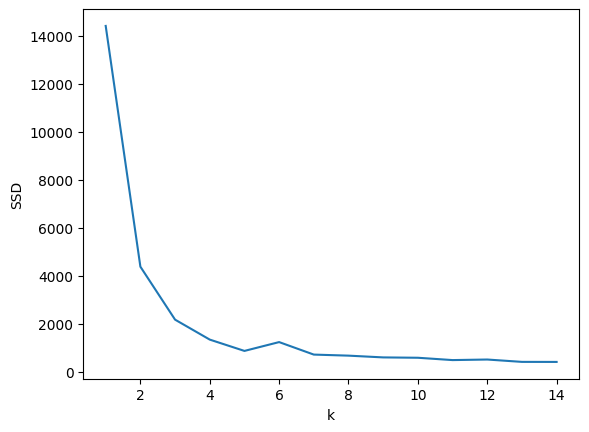

In [117]:
### Here, plot the elbow curve
ssd_values = Elbow(X, Y)
K = range(1, 15)
plt.plot(K, ssd_values)
plt.xlabel('k')
plt.ylabel('SSD')

plt.show()

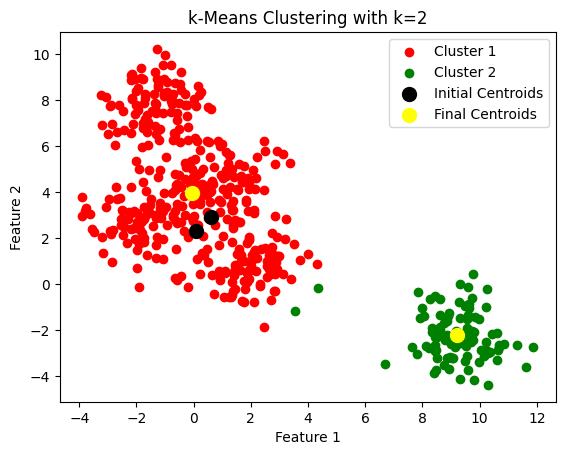

In [118]:
import matplotlib.pyplot as plt

# Perform k-means clustering
k = 2
final_centroids, initial_centroids, D = kMeans(X, Y, k)

# Manually assign colors for up to 3 clusters
cluster_colors = ['red', 'green', 'blue']

# Plot each cluster with manually assigned colors
cluster_index = 0
for centroid, cluster_points in D.items():
    cluster_color = cluster_colors[cluster_index % len(cluster_colors)]
    plt.scatter([p.x for p in cluster_points], [p.y for p in cluster_points], color=cluster_color, label=f'Cluster {cluster_index + 1}')
    cluster_index += 1

# Plot initial centroids with black color
plt.scatter([p.x for p in initial_centroids], [p.y for p in initial_centroids], color='black', s=100, label='Initial Centroids')

# Plot final centroids with yellow color
plt.scatter([p.x for p in final_centroids], [p.y for p in final_centroids], color='yellow', s=100, label='Final Centroids')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-Means Clustering with k={k}')
plt.legend()
plt.show()
